# Instructions
* An Excel sheet is provided to download the data given against it.
Work with the data.
* while submitting, submit the .ipynb file directly. ***no need to convert to pdf***
* Select the Data set, Processing specific row ranges according to your Roll number's last Digit
  
Here is the list of Roll Numbers last digit from 1 to (10 or 0):   

1. RO_data8
2. Drilling_data3
3. RO_data9
4. Drilling_data5
5. Drilling_data1
6. Flocculant_data6
7. Flocculant_data7
8. Drilling_data4
9. Drilling_data2
10. RO_data10

* Rename the file to your roll number.ipynb (eg:111101001.ipynb)


# SECTION 1
* Import all required
* Make sure that all the import statements are written in the below python cell

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

# SECTION 2:
* Import the dataset given to you and name it with your name.
* Example: your name: john
  Name of dataframe : john_df

In [8]:
anuj_df = pd.read_excel('Updated_Flocculant_data7.xlsx') 
anuj_df.head()


,Timestamp,NaN,F_f,F_u,F_in,rho_u,T_o,tau_imp,h_bm,F_u.1,F in
0,2025-02-01 08:00:00,1.0,4.5,99.49,150.29,1.06,3158.2,9.9,37.1,99.49,150.29
1,2025-02-01 08:01:00,2.0,4.5,91.81,146.11,1.07,3212.0,10.0,37.1,91.81,146.11
2,2025-02-01 08:02:00,3.0,4.2,93.67,152.49,1.05,3314.3,10.0,37.2,93.67,152.49
3,2025-02-01 08:03:00,4.0,4.4,95.71,146.21,1.09,3265.5,9.5,36.8,95.71,146.21
4,2025-02-01 08:04:00,5.0,4.3,99.16,142.15,1.10,3217.0,10.0,37.1,99.16,142.15


# SECTION 3
 Preprocessing
* Remove duplicates if they are present
* Fill null values with the mean (**Roll no: Even**)/median (**Roll no: ODD**) if any are found
* *Optional:* If you want you can try null value imputation using KNNImputer or MissingForest instead of above (if you are doing then you can add a small write up at the end as to why we use these algorithms over mean/median imputing and how they work)
  
  ***Feature scaling:***
* Min-Max Scaling (Normalization) **Roll No: Even**
* Standardization (Z-Score Normalization) **Roll No: ODD**

  ***Correlation Heatmap***
 * Drop the columns based on the heat map if required 

In [9]:
anuj_df.duplicated().sum()

np.int64(0)

In [11]:
anuj_df.isnull().sum()


Timestamp     0
NaN           5
F_f          10
F_u          25
F_in         29
rho_u        13
T_o           8
tau_imp      13
h_bm          9
F_u.1        23
F in         29
dtype: int64

In [12]:
anuj_df = anuj_df.fillna(anuj_df.median())
print(anuj_df.isna().sum())

Timestamp    0
NaN          0
F_f          0
F_u          0
F_in         0
rho_u        0
T_o          0
tau_imp      0
h_bm         0
F_u.1        0
F in         0
dtype: int64


In [17]:
import pandas as pd
from scipy import stats


# Select numeric columns
numeric_cols = anuj_df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with column mean
anuj_df[numeric_cols] = anuj_df[numeric_cols].fillna(anuj_df[numeric_cols].mean())

# Apply z-score standardization
anuj_df[numeric_cols] = anuj_df[numeric_cols].apply(stats.zscore)


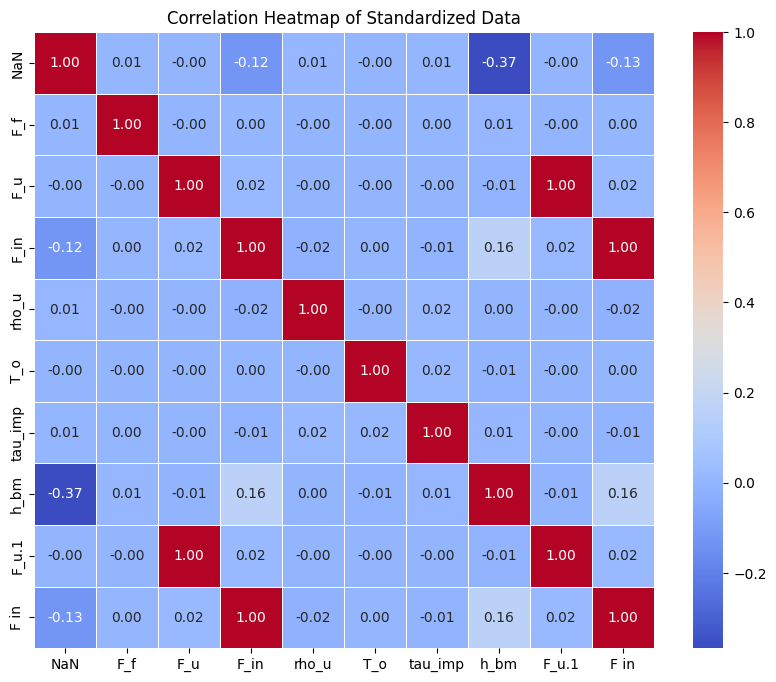

In [18]:

numerical_cols = anuj_df.select_dtypes(include=np.number).columns
correlation_matrix = anuj_df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Numerical Columns)')
plt.show()


In [22]:
# nothing to drop
df=anuj_df;

# SECTION 4: (Perform smoothening technique, plot the ACF and PACF to understand the time series correlations)
 ***Smoothening Technique***
 * SG-Filter **Roll No: ODD**
 * Exponential Moving Average **Roll No: Even**   

* Plot each of the ACF and PACF functions before and after smoothening

In [21]:
from scipy.signal import savgol_filter

# List all columns except 'Timestamp' and 'NaN'
cols_to_smooth = [col for col in anuj_df.columns if col not in ['Timestamp', 'NaN']]

# Set parameters for the Savitzky-Golay filter
window_length = 11  # Must be odd and less than or equal to the number of rows
polyorder = 3

# Apply the filter and create new columns with '_sg' suffix
for col in cols_to_smooth:
    anuj_df[col + '_sg'] = savgol_filter(anuj_df[col], window_length=window_length, polyorder=polyorder)

# Now anuj_df contains smoothed versions of all relevant columns


In [26]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ---- -----------


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


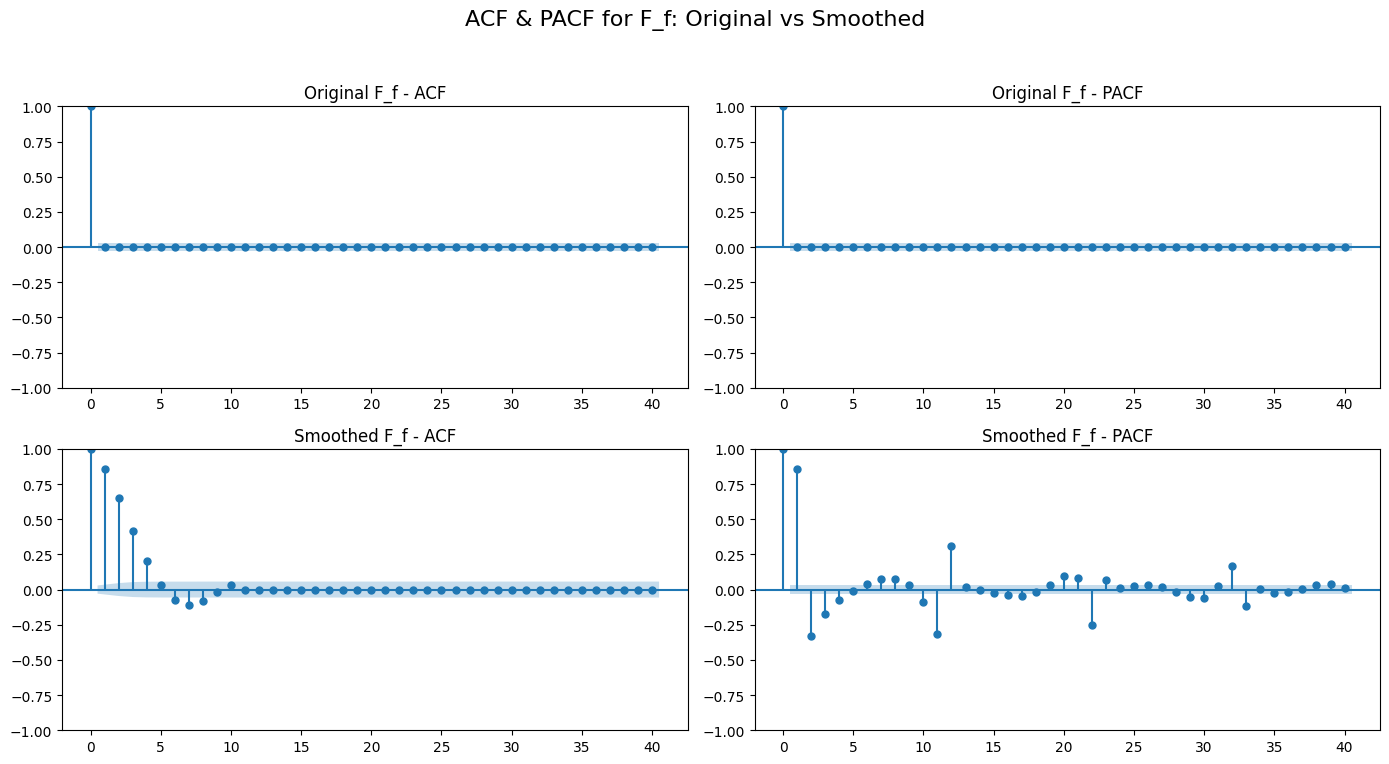

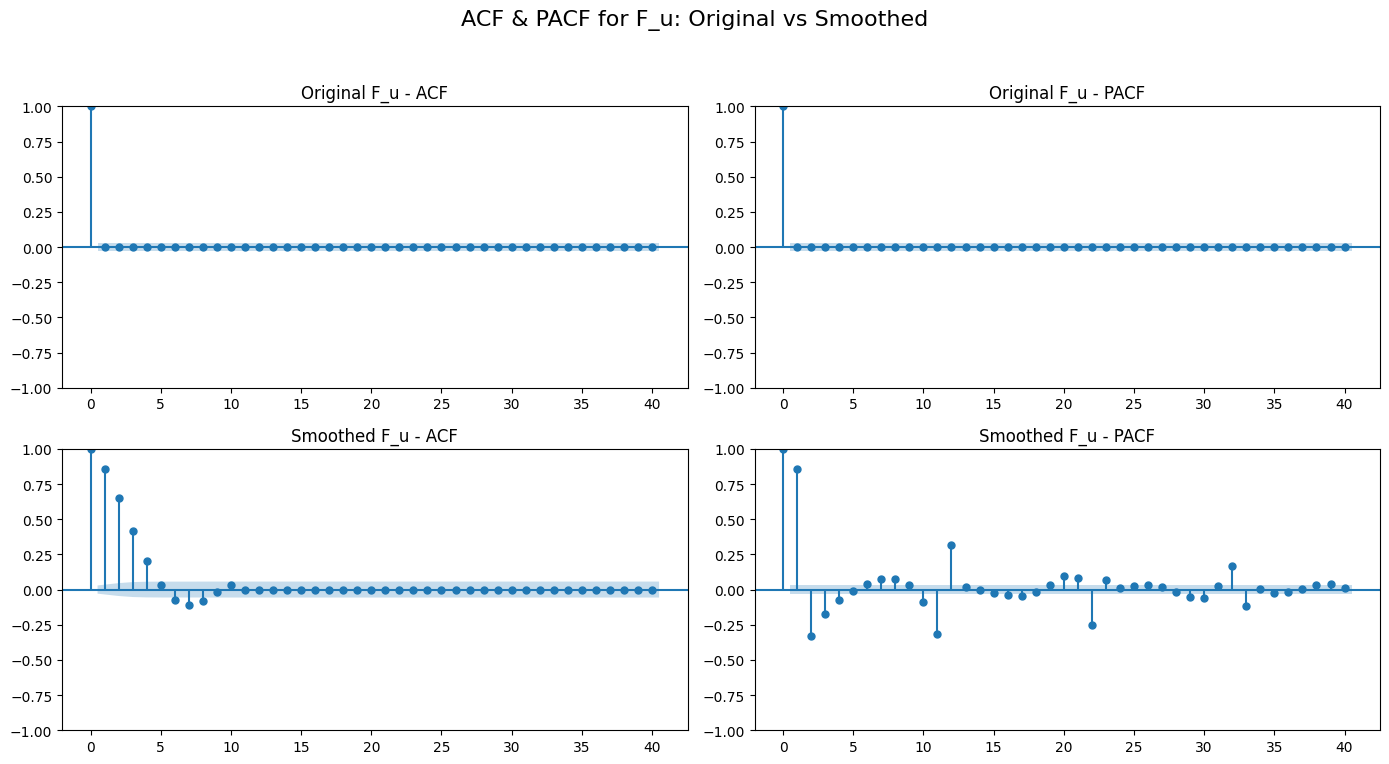

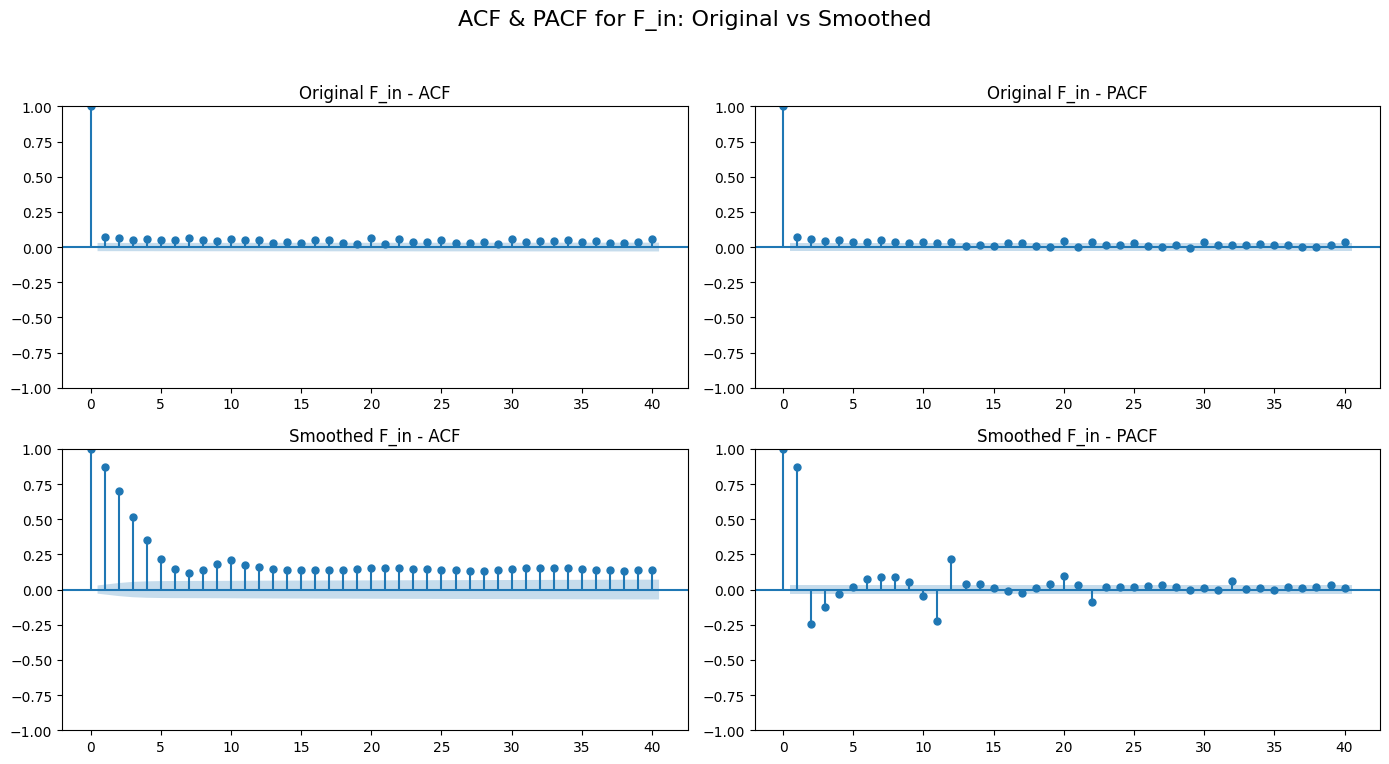

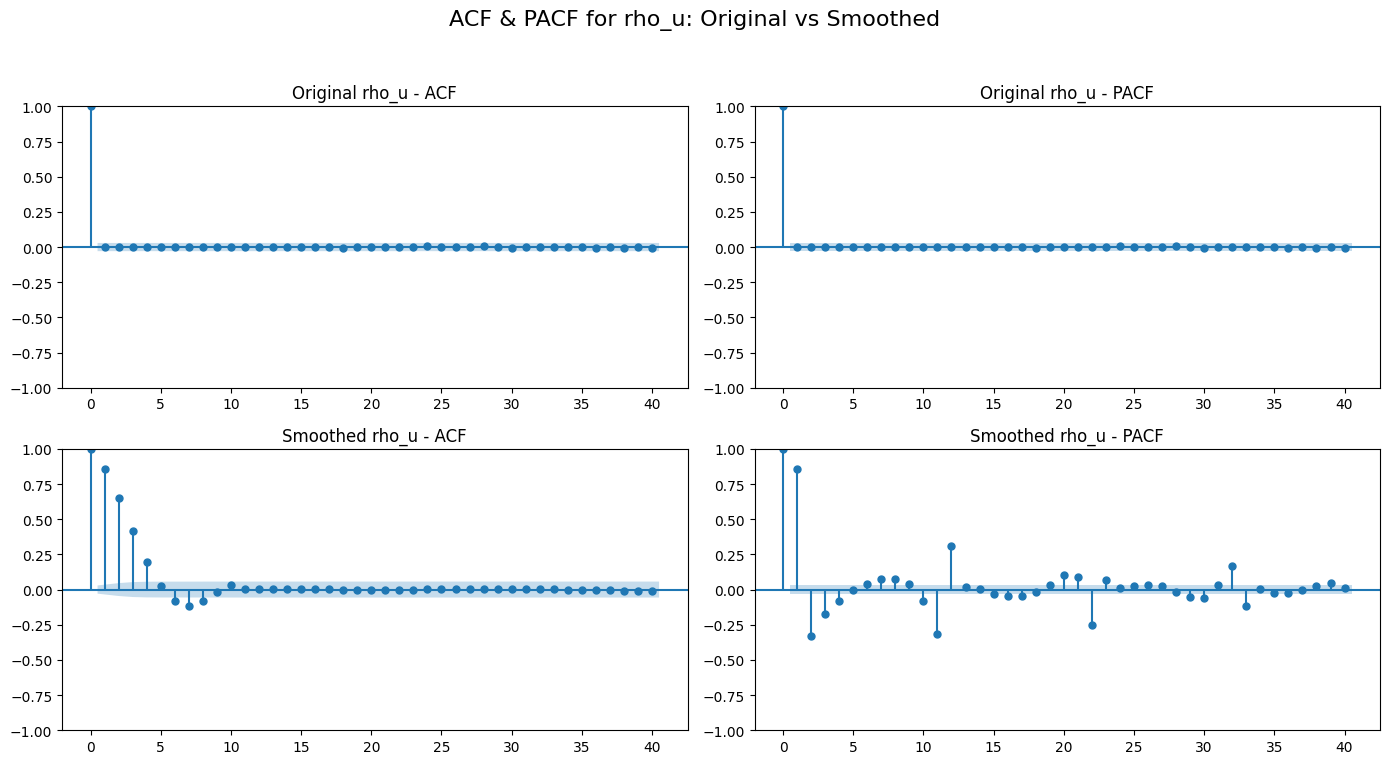

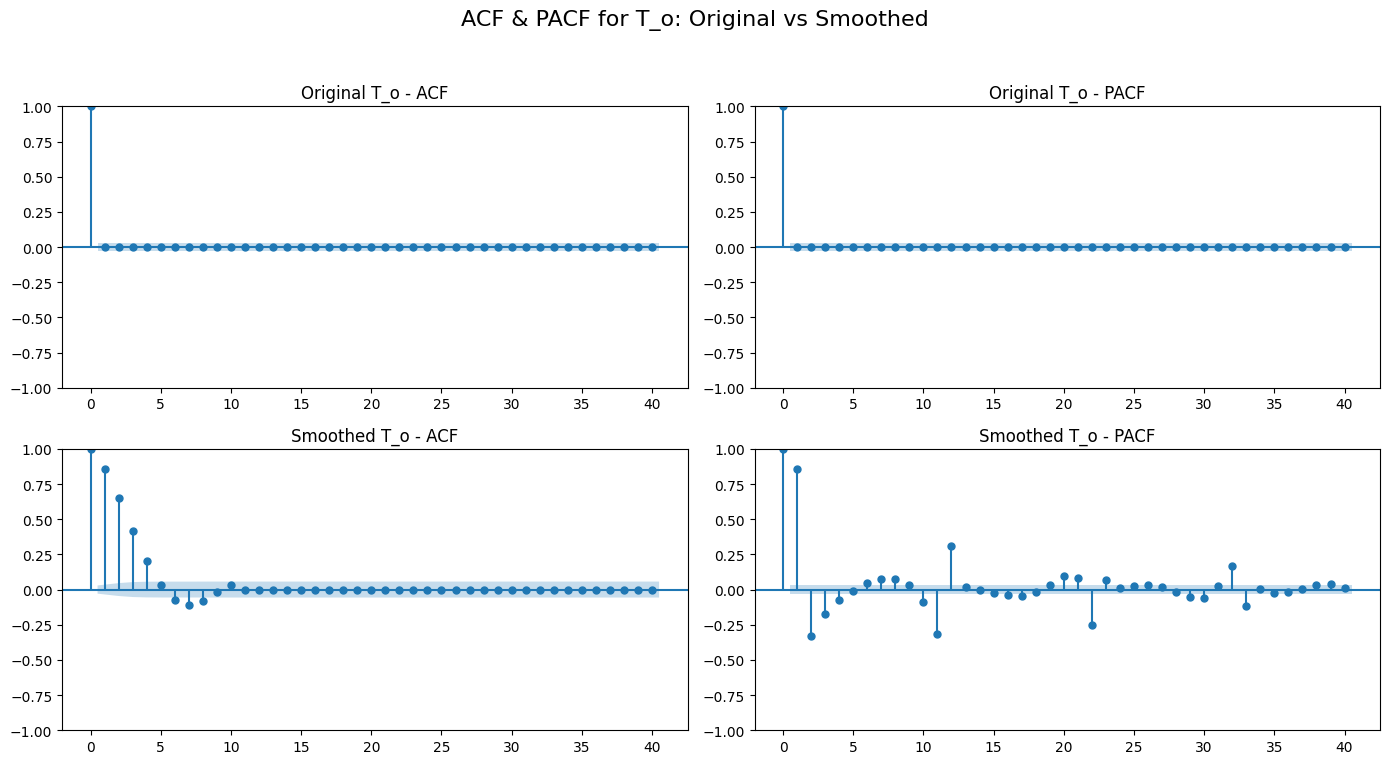

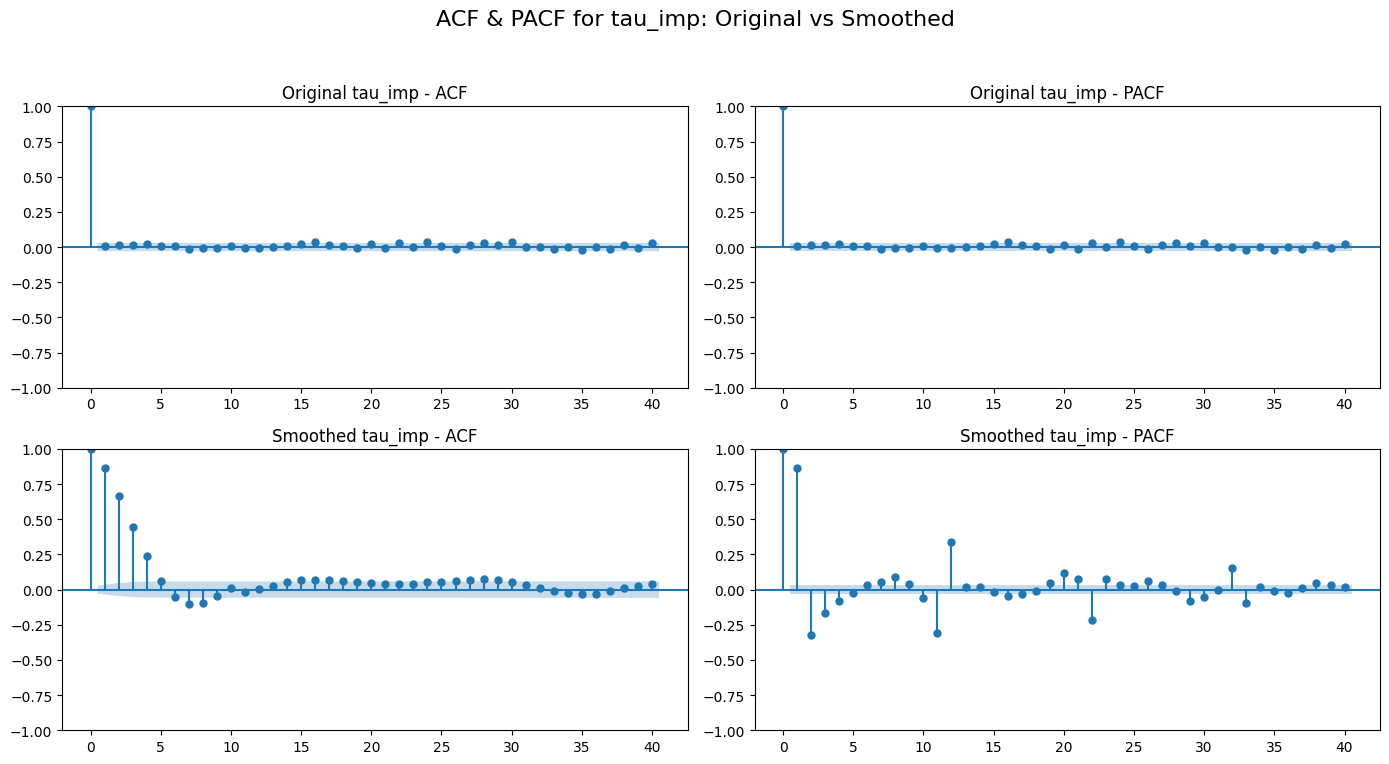

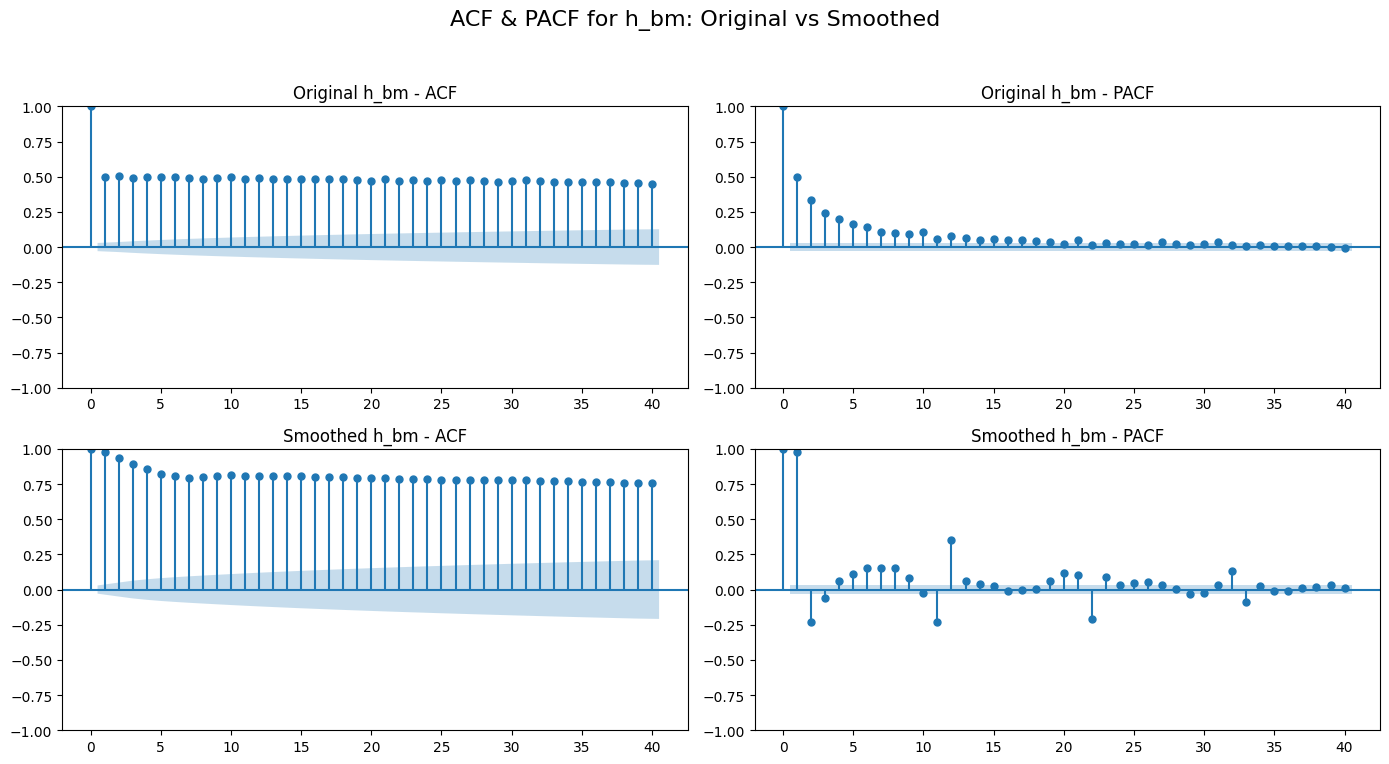

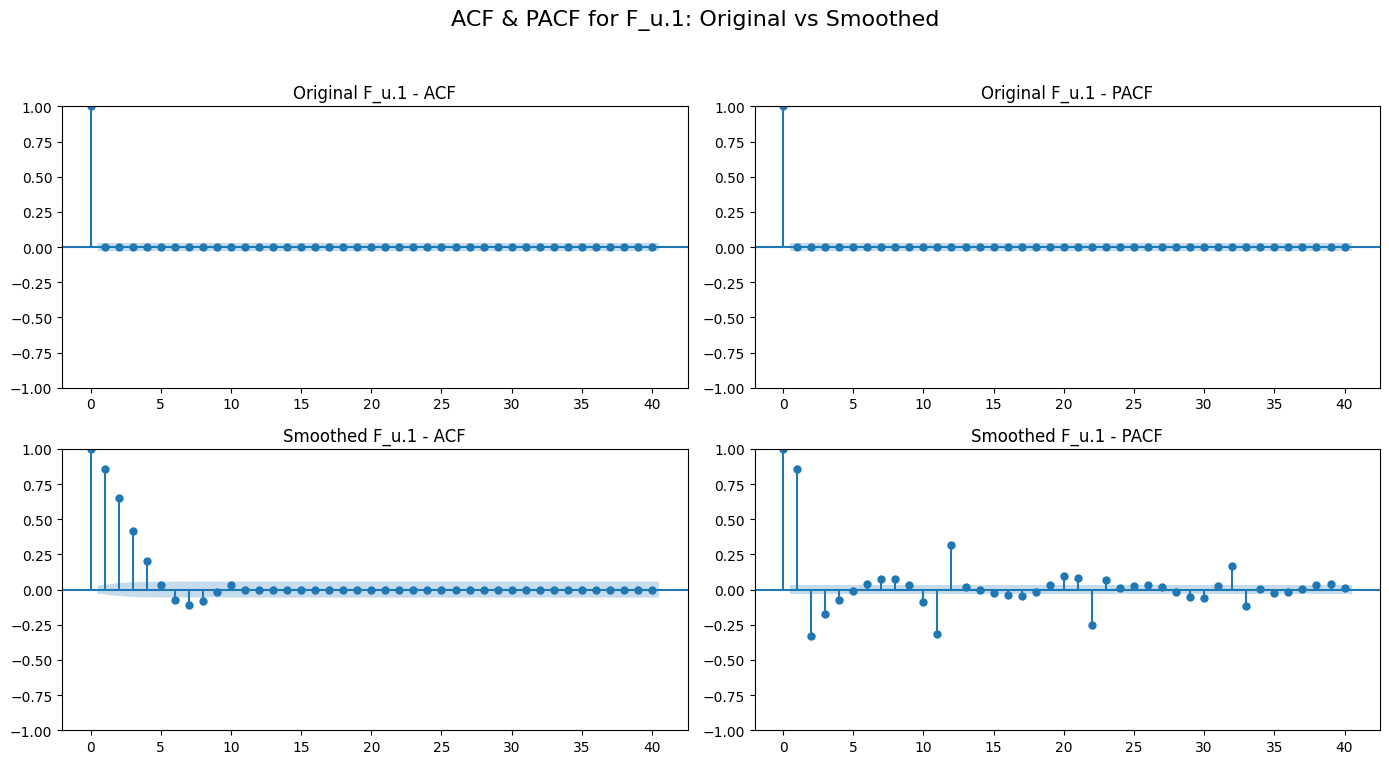

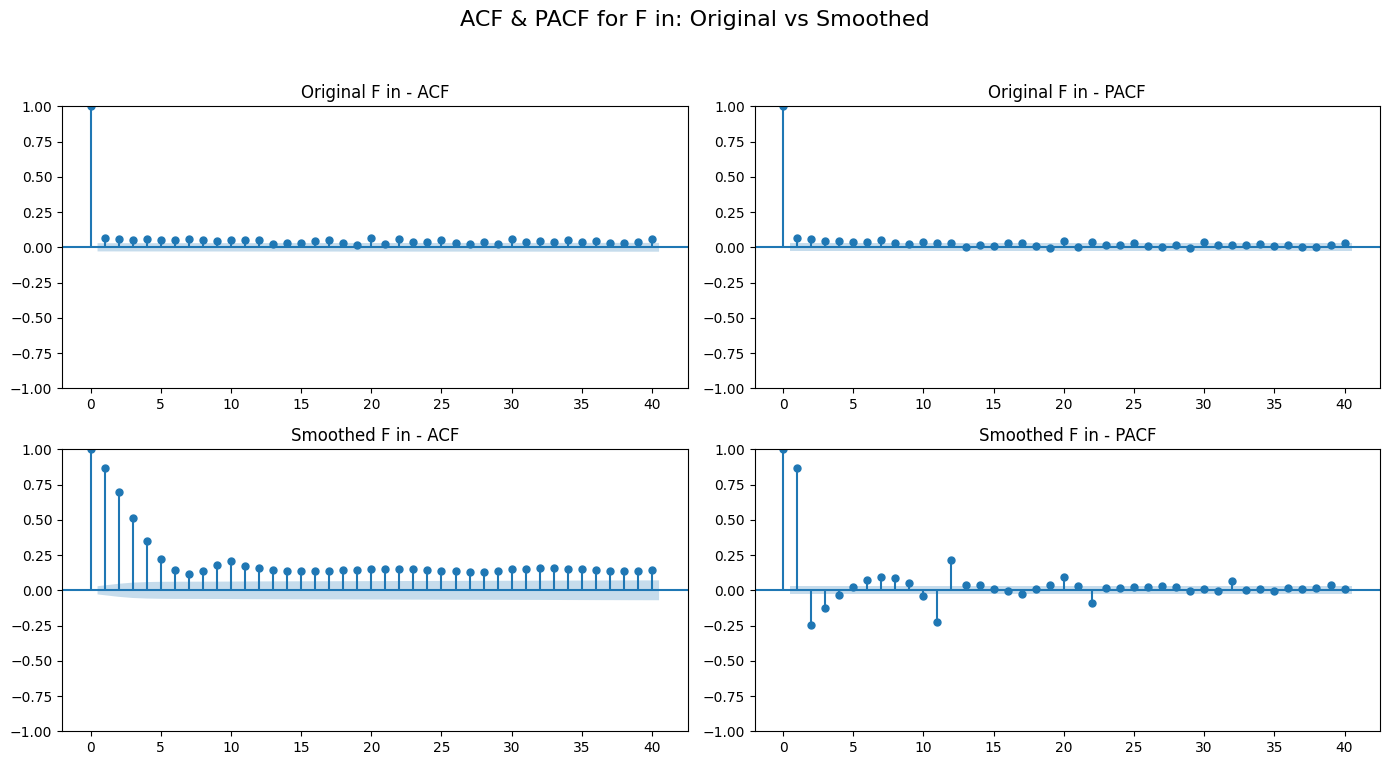

In [27]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# List of columns to analyze (excluding 'Timestamp', 'NaN', and any non-numeric columns)
cols_to_analyze = [col for col in anuj_df.columns if col not in ['Timestamp', 'NaN'] and not col.endswith('_sg')]

# Number of lags to display (adjust as needed)
n_lags = 40

for col in cols_to_analyze:
    smoothed_col = col + '_sg'
    if smoothed_col in anuj_df.columns:
        fig, axes = plt.subplots(2, 2, figsize=(14, 8))
        fig.suptitle(f'ACF & PACF for {col}: Original vs Smoothed', fontsize=16)

        # Original ACF
        plot_acf(anuj_df[col].dropna(), lags=n_lags, ax=axes[0, 0])
        axes[0, 0].set_title(f'Original {col} - ACF')

        # Original PACF
        plot_pacf(anuj_df[col].dropna(), lags=n_lags, ax=axes[0, 1], method='ywm')
        axes[0, 1].set_title(f'Original {col} - PACF')

        # Smoothed ACF
        plot_acf(anuj_df[smoothed_col].dropna(), lags=n_lags, ax=axes[1, 0])
        axes[1, 0].set_title(f'Smoothed {col} - ACF')

        # Smoothed PACF
        plot_pacf(anuj_df[smoothed_col].dropna(), lags=n_lags, ax=axes[1, 1], method='ywm')
        axes[1, 1].set_title(f'Smoothed {col} - PACF')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


# SECTION 5: (Unsupervised Learning)

* **Plot - RO: TDS_p & flowrate_p , Flocculant: To & rho_u, Drilling: Hookload & ROP**
* Perform KMeans Clustering and plot the Elbow and Silhouette score curves for optimal K
* Perform any one of Clustering technique from HDBSCAN, Affinity Propagation, and Hierarchical Clustering

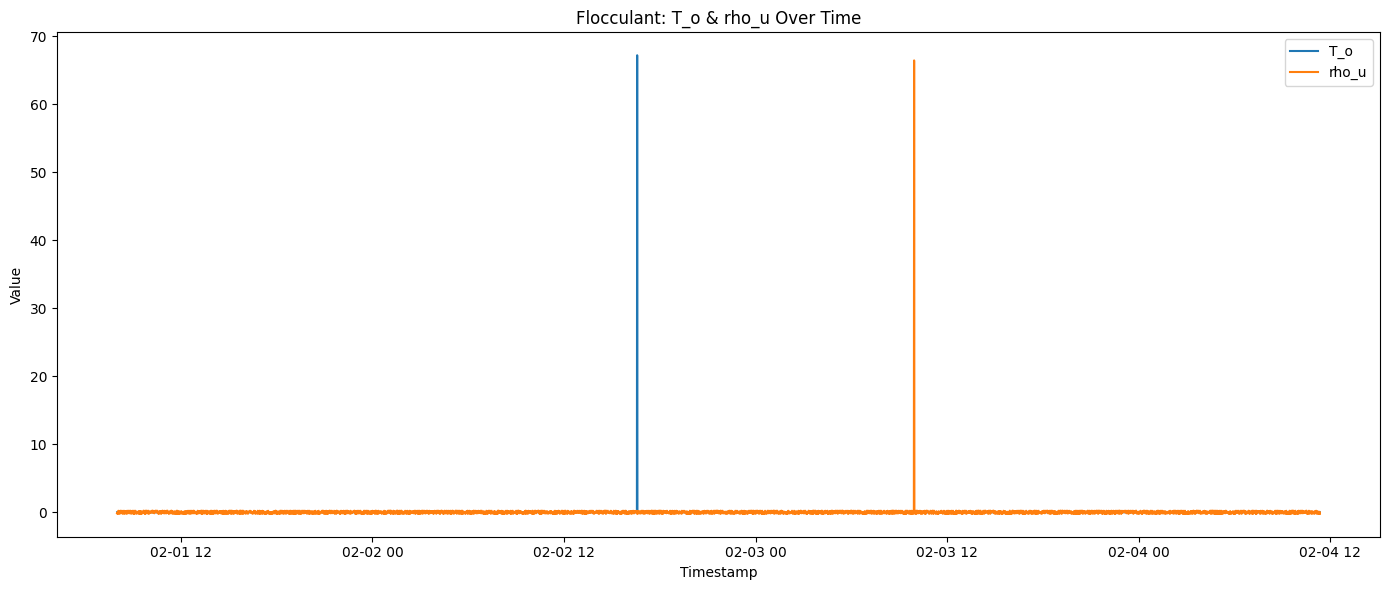

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(anuj_df['Timestamp'], anuj_df['T_o'], label='T_o', color='tab:blue')
plt.plot(anuj_df['Timestamp'], anuj_df['rho_u'], label='rho_u', color='tab:orange')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Flocculant: T_o & rho_u Over Time')
plt.legend()
plt.tight_layout()
plt.show()


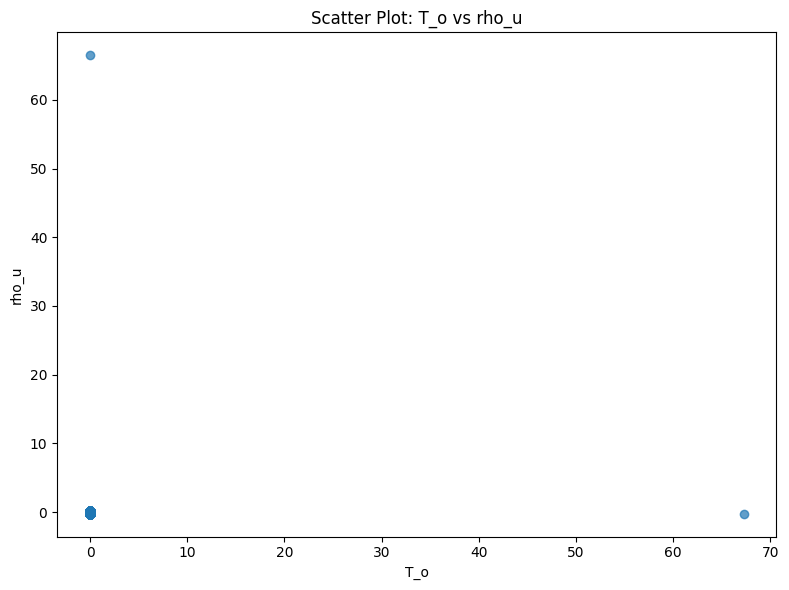

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(anuj_df['T_o'], anuj_df['rho_u'], alpha=0.7)
plt.xlabel('T_o')
plt.ylabel('rho_u')
plt.title('Scatter Plot: T_o vs rho_u')
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data
anuj_df = pd.read_excel("Updated_Flocculant_data7.xlsx")

# Drop columns not useful for clustering
cols_to_drop = ['Timestamp', 'NaN', 'F_u.1', 'F in']
cols_to_drop = [col for col in cols_to_drop if col in anuj_df.columns]
X = anuj_df.drop(columns=cols_to_drop)

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Fill any remaining missing values with the median (as per your prior steps)
X = X.fillna(X.median())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


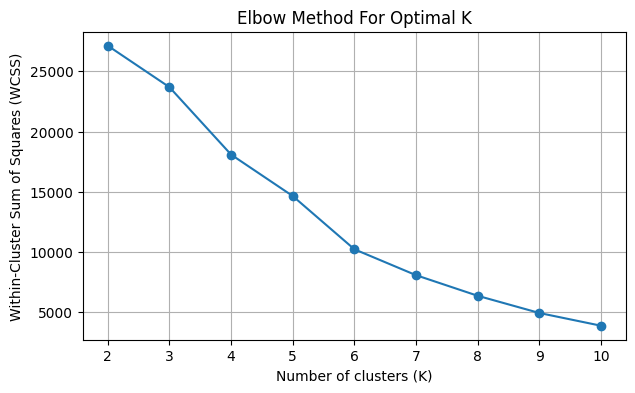

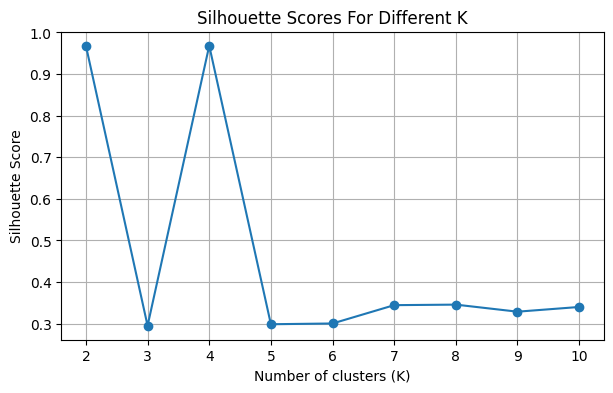

In [31]:
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Curve
plt.figure(figsize=(7,4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.grid()
plt.show()

# Plot Silhouette Score Curve
plt.figure(figsize=(7,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different K')
plt.grid()
plt.show()


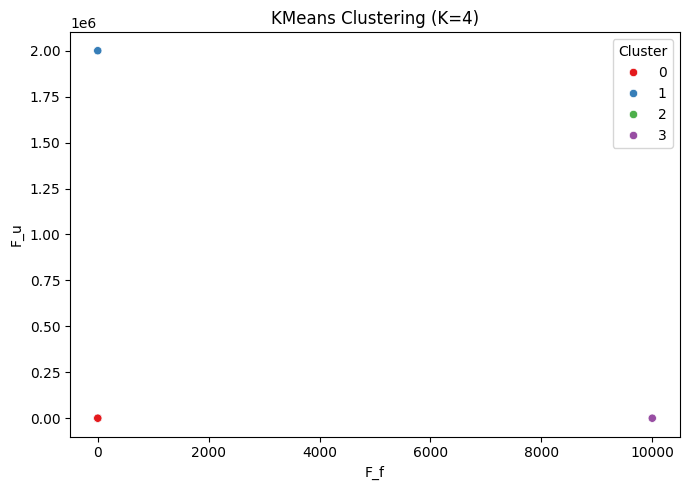

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Drop unnecessary columns
cols_to_drop = ['Timestamp', 'NaN', 'F_u.1', 'F in']
X = anuj_df.drop(columns=[col for col in cols_to_drop if col in anuj_df.columns], errors='ignore')

# 2. Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# 3. Fill any remaining NaNs with the column median
X = X.fillna(X.median())

# 4. KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
anuj_df['KMeans'] = kmeans.fit_predict(X)

# 5. Choose two features for plotting (use any two numeric columns)
plot_features = X.columns[:2]

plt.figure(figsize=(7, 5))
sns.scatterplot(x=anuj_df[plot_features[0]], y=anuj_df[plot_features[1]], hue=anuj_df['KMeans'], palette='Set1')
plt.title("KMeans Clustering (K=4)")
plt.xlabel(plot_features[0])
plt.ylabel(plot_features[1])
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [36]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Drop unnecessary columns
cols_to_drop = ['Timestamp', 'NaN', 'F_u.1', 'F in']
X = anuj_df.drop(columns=[col for col in cols_to_drop if col in anuj_df.columns], errors='ignore')

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Drop rows with any missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna(axis=0, how='any')

# Optionally, reset index for clean plotting
X = X.reset_index(drop=True)


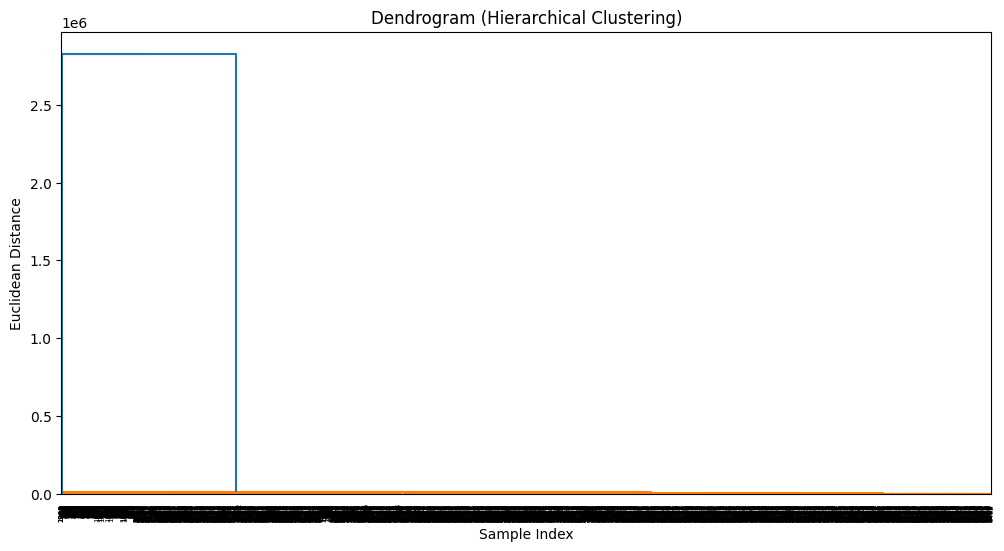

In [37]:
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
cols_to_drop = ['Timestamp', 'NaN', 'F_u.1', 'F in']
X = anuj_df.drop(columns=[col for col in cols_to_drop if col in anuj_df.columns], errors='ignore')
X = X.select_dtypes(include=[np.number])

# Drop rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna(axis=0, how='any')

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
if X_scaled.shape[0] > 200:
    np.random.seed(42)
    idx = np.random.choice(X_scaled.shape[0], 200, replace=False)
    X_sampled = X_scaled[idx]
else:
    X_sampled = X_scaled


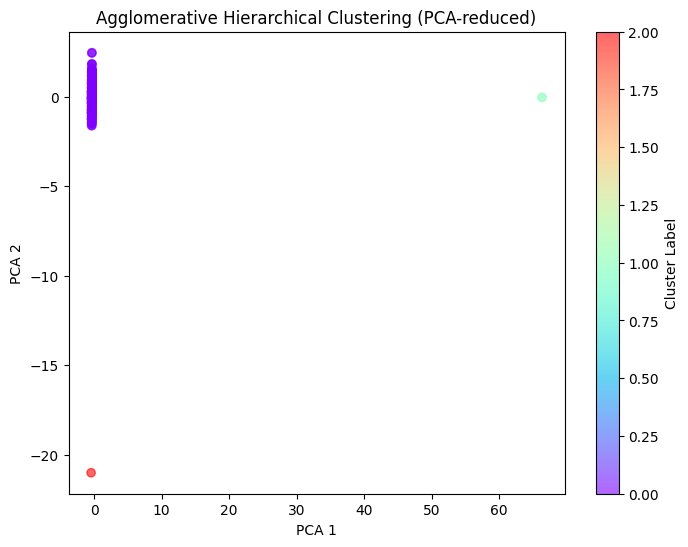

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Choose number of clusters (e.g., 3 based on dendrogram)
n_clusters = 3
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
labels = agg_cluster.fit_predict(X_sampled)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', alpha=0.6)
plt.title('Agglomerative Hierarchical Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster Label')
plt.show()


# SECTION 6: Perform ARIMA and SARIMA algorithm

* **Target - RO: TDS_p, Flocculant: To, Drilling: Hookload**
* Train the aforementioned algorithms.
* Calculate the parameters of each of the model.
* Calculate the mean-squared error and R2 value for all.

In [46]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

def fit_and_evaluate(series, seasonal=False):
    train = series[:-20]
    test = series[-20:]

    if seasonal:
        model = sm.tsa.SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
    else:
        model = sm.tsa.ARIMA(train, order=(1,1,1))

    results = model.fit()
    forecast = results.forecast(steps=20)

    mse = mean_squared_error(test, forecast)
    r2 = r2_score(test, forecast)

    print(f"{'SARIMA' if seasonal else 'ARIMA'} Results:")
    print("MSE:", mse)
    print("R2 Score:", r2)
    return results, forecast, test

# Use T_o as the target
series = anuj_df['T_o'].dropna()
fit_and_evaluate(series, seasonal=False)
fit_and_evaluate(series, seasonal=True)


C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib

ARIMA Results:
MSE: 178897.5413317062
R2 Score: -10.110577998125592
SARIMA Results:
MSE: 337370.5177755118
R2 Score: -19.95267170308791


C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x270956ad150>,
 4494    4978.875730
 4495    3159.969369
 4496    3174.011831
 4497    3160.498007
 4498    3158.470067
 4499    3164.305574
 4500    3165.299927
 4501    3142.023654
 4502    3175.568993
 4503    3156.054382
 4504    3165.984332
 4505    3154.231914
 4506    4970.176653
 4507    3157.808733
 4508    3171.411591
 4509    3158.068664
 4510    3156.262101
 4511    3161.951338
 4512    3162.906600
 4513    3139.634706
 Name: predicted_mean, dtype: float64,
 4500    3453.9
 4501    3277.7
 4502    3421.3
 4503    3393.8
 4504    3580.1
 4505    3449.3
 4506    3521.3
 4507    3393.8
 4508    3286.2
 4509    3455.6
 4510    3596.0
 4511    3281.9
 4512    3251.6
 4513    3240.2
 4516    3404.9
 4517    3234.1
 4518    3544.9
 4519    3579.0
 4520    3590.6
 4521    3247.5
 Name: T_o, dtype: float64)

# SECTION 7: Compare performances of each algorithm and how the different clustering techniques vary

In [ ]:
# K-means clustering is a partitioning method that aims to minimize the variance within each cluster.
# It is efficient and scales well with large datasets, making it suitable for real-time applications.
# However, K-means requires the number of clusters to be specified in advance, which can lead to suboptimal results if this is not accurately determined.
# It is also sensitive to initialization and can be influenced by outliers.

# # Hierarchical clustering, on the other hand, creates a tree of clusters (dendrogram) without needing to specify the number of clusters upfront.
# It can be divisive (starting with all data in one cluster and splitting) or agglomerative (starting with individual points and merging them).
# This approach allows for a comprehensive view of the data's structure. However, hierarchical clustering is computationally intensive and less 
# efficient on large datasets compared to K-means, making it impractical for very large datasets. Additionally,
# it is sensitive to noise and outliers since each step involves merging or splitting clusters based on distance metrics.